# Importing the loan dataset using pandas Framework

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('loan_data_set.csv')

# Read first 5 rows

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Read shape of the dataset

In [4]:
data.shape

(614, 13)

# Read all columns datatypes

In [6]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
X = data[['Gender','Married','Education','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']].values

In [338]:
X

array([['Male', 'No', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', 'Graduate', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', 'Graduate', ..., 360.0, 0.0, 'Semiurban']],
      dtype=object)

# Show all unique values in columns of data

In [7]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [11]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [13]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# Check the total null values in each columns

In [14]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Loan_ID column is of object type then there is no use of it so drop this column

In [15]:
df=data.dropna()
df=df.drop('Loan_ID',1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Here Dependents columns contain '3+' value which can not be used again in model so replace it with nan value and then further replace it by 0

In [16]:
import numpy as np
df = df.replace('3+', np.nan)
df = df.dropna(how='all', axis=0)
df = df.replace(np.nan, 0)
df['Dependents']

1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    0
611    1
612    2
613    0
Name: Dependents, Length: 480, dtype: object

# Convert Dependents column of object type into int value

In [17]:
df['Dependents']=df['Dependents'].astype(int)
df.shape

(480, 12)

In [18]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.520833,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,0.777813,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,1.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,2.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000


# Choose all value from Gender  column to Property area and stored in X variable

In [19]:
X = df[['Gender','Married','Education','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']].values
X

array([['Male', 'Yes', 'Graduate', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', 'Not Graduate', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', 'Graduate', ..., 360.0, 0.0, 'Semiurban']],
      dtype=object)

In [20]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117a219b0>,
      dtype=object)

In [21]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Male','Female'])
X[:,0] = le_sex.transform(X[:,0]) 
X

array([[1, 'Yes', 'Graduate', ..., 360.0, 1.0, 'Rural'],
       [1, 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       [1, 'Yes', 'Not Graduate', ..., 360.0, 1.0, 'Urban'],
       ...,
       [1, 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       [1, 'Yes', 'Graduate', ..., 360.0, 1.0, 'Urban'],
       [0, 'No', 'Graduate', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [22]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Yes','No'])
X[:,1] = le_sex.transform(X[:,1]) 
X

array([[1, 1, 'Graduate', ..., 360.0, 1.0, 'Rural'],
       [1, 1, 'Graduate', ..., 360.0, 1.0, 'Urban'],
       [1, 1, 'Not Graduate', ..., 360.0, 1.0, 'Urban'],
       ...,
       [1, 1, 'Graduate', ..., 360.0, 1.0, 'Urban'],
       [1, 1, 'Graduate', ..., 360.0, 1.0, 'Urban'],
       [0, 0, 'Graduate', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [23]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Graduate','Not Graduate'])
X[:,2] = le_sex.transform(X[:,2]) 
X

array([[1, 1, 0, ..., 360.0, 1.0, 'Rural'],
       [1, 1, 0, ..., 360.0, 1.0, 'Urban'],
       [1, 1, 1, ..., 360.0, 1.0, 'Urban'],
       ...,
       [1, 1, 0, ..., 360.0, 1.0, 'Urban'],
       [1, 1, 0, ..., 360.0, 1.0, 'Urban'],
       [0, 0, 0, ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [24]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Rural','Urban','Semiurban'])
X[:,10] = le_sex.transform(X[:,10]) 
X

array([[1, 1, 0, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [1, 1, 1, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 0, 0, ..., 360.0, 0.0, 1]], dtype=object)

In [25]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Yes','No'])
X[:,4] = le_sex.transform(X[:,4]) 
X

array([[1, 1, 0, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [1, 1, 1, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 0, 0, ..., 360.0, 0.0, 1]], dtype=object)

# Put last column Loan_Status in y column

In [27]:
y=df['Loan_Status']
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [28]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['N','Y'])
y[:] = le_sex.transform(y[:]) 
y

/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [29]:
y.shape

(480,)

In [30]:
X.shape

(480, 11)

In [31]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

# Normalize X data

In [32]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.46719815,  0.73716237, -0.50325312,  0.61668626, -0.3992747 ,
        -0.13796959, -0.02795204, -0.20808917,  0.27554157,  0.41319694,
        -1.31886834],
       [ 0.46719815,  0.73716237, -0.50325312, -0.67031115,  2.50454133,
        -0.4175358 , -0.604633  , -0.97900085,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815,  0.73716237,  1.98707162, -0.67031115, -0.3992747 ,
        -0.49118022,  0.29710022, -0.30756164,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815, -1.35655324, -0.50325312, -0.67031115, -0.3992747 ,
         0.11228014, -0.604633  , -0.04644639,  0.27554157,  0.41319694,
         1.25977445],
       [ 0.46719815,  0.73716237, -0.50325312,  1.90368367,  2.50454133,
         0.00931924,  0.99997795,  1.52024509,  0.27554157,  0.41319694,
         1.25977445]])

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (336, 11) (336,)
Test set: (144, 11) (144,)


# 1)KNearest Neighbour

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65277778, 0.61805556, 0.73611111, 0.72916667, 0.77083333,
       0.76388889, 0.79166667, 0.78472222, 0.78472222])

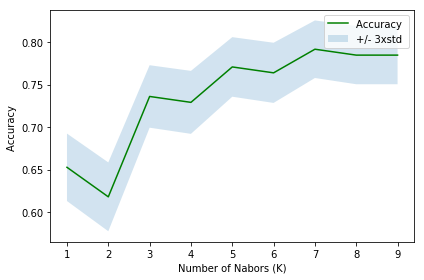

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.20)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [38]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7916666666666666 with k= 7


# 2)Decision Tree Classifier Model and its Evaluation is also done by using different metrics method

In [43]:
from sklearn.tree import DecisionTreeClassifier
algo2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
algo2.fit(X_train,y_train)
pred = algo2.predict(X_test)
#pred

from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred))

#Evaluation By jaccard_similarity_score Method

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, pred))

#Evaluation by f1_score model

from sklearn.metrics import f1_score
print(f1_score(y_test, pred, average='weighted'))

#print Classification_report

from sklearn.metrics import classification_report
print (classification_report(y_test, pred))

DecisionTrees's Accuracy:  0.7569444444444444
0.7569444444444444
0.7258506234539857
              precision    recall  f1-score   support

           0       0.82      0.37      0.51        49
           1       0.75      0.96      0.84        95

    accuracy                           0.76       144
   macro avg       0.78      0.66      0.67       144
weighted avg       0.77      0.76      0.73       144



/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# 3)SVM Model using 'rbf' kernel and its Evaluation done by different metrics method

In [44]:
from sklearn import svm
algo3= svm.SVC(kernel='rbf')
algo3.fit(X_train, y_train) 
ypred = algo3.predict(X_test)
#ypred

#Evaluation done by f1_score Method

from sklearn.metrics import f1_score
print(f1_score(y_test, ypred, average='weighted'))

#Evaluation Done by jaccard_similarity_score

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, ypred))

0.7603757389118969
0.7847222222222222


/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# SVM model using 'poly' kernel and its Evaluation done by different metrics method

In [45]:
from sklearn import svm
algo31= svm.SVC(kernel='poly')
algo31.fit(X_train, y_train) 
ypred = algo31.predict(X_test)
#ypred

#Evaluation by f1_score Methods

from sklearn.metrics import f1_score
print(f1_score(y_test, ypred, average='weighted') )

#Evaluation done by jaccard_similarity_score

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, ypred))

0.7354681069958847
0.7638888888888888


/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# SVM model by 'linear 'kernel and its Evaluation done by differnt metrics method

In [46]:
from sklearn import svm
algo32= svm.SVC(kernel='linear')
algo32.fit(X_train, y_train) 
ypred = algo32.predict(X_test)
#ypred

#Evaluation done by f1_score

from sklearn.metrics import f1_score
print(f1_score(y_test, ypred, average='weighted') )

#Evaluation done by jaccard_similarity_score

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, ypred))

0.747604485219164
0.7777777777777778


/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# SVM model using 'sigmoid' kernel and its Evaluation done by different metrics method

In [48]:
from sklearn import svm
algo33= svm.SVC(kernel='sigmoid')
algo33.fit(X_train, y_train) 
ypred = algo33.predict(X_test)
#ypred

#Evaluation done by f1_score method

from sklearn.metrics import f1_score
print(f1_score(y_test, ypred, average='weighted') )

#Evaluation done by jaccard_similarity_score Method

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, ypred))

#print classification Report

from sklearn.metrics import classification_report
print (classification_report(y_test, ypred))

0.7439096850861557
0.7777777777777778
              precision    recall  f1-score   support

           0       0.95      0.37      0.53        49
           1       0.75      0.99      0.85        95

    accuracy                           0.78       144
   macro avg       0.85      0.68      0.69       144
weighted avg       0.82      0.78      0.74       144



/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# 4) Using Logistic Regression Model and its Evaluation done by  different metrics method

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
#LR

#Predict the X_test

ypred1 = LR.predict(X_test)
ypred1

#Predict the probability of X_test

ypred_prob = LR.predict_proba(X_test)
ypred_prob

#Evaluation done by f1_score Method

from sklearn.metrics import f1_score
print(f1_score(y_test, ypred1, average='weighted') )

#Evaluation done by jaccard_similarity_score method

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, ypred1))

#Evaluation done by log_loss Method

from sklearn.metrics import log_loss
print(log_loss(y_test, ypred_prob) )

#print Classification Report

from sklearn.metrics import classification_report
print (classification_report(y_test, ypred1))

0.747604485219164
0.7777777777777778
0.5633264138079735
              precision    recall  f1-score   support

           0       0.90      0.39      0.54        49
           1       0.76      0.98      0.85        95

    accuracy                           0.78       144
   macro avg       0.83      0.68      0.70       144
weighted avg       0.81      0.78      0.75       144



/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
